In [1]:
from bmadx.distgen_utils import create_beam
from bmadx.plot import plot_projections
from bmadx.constants import PI
import os
import torch
from bmadx.bmad_torch.track_torch import particle_to_beam


n_part = 100_000
p0c = 35182940.35479228
import numpy as np



In [2]:
from bmadx import Particle, M_ELECTRON
f2 = open('./partcl_GPSR_OPALData2.data', 'r')


ff2 = f2.readlines()
f2.close()

# Empty list
x = []
y = []
px= []
py= []
z = []
pz = [] 
for fi in ff2:
    token = fi.split()
    try:
        float(token[0])
        x.append(float(token[0]))
        px.append(float(token[1]))
        y.append(float(token[2]))
        py.append(float(token[3]))
        z.append(float(token[4]))
        pz.append(float(token[5]))
    except:
        continue
x = np.array(x)*1
y = np.array(y)*1
z = np.array(z)*6
px= np.array(px)*1
py= np.array(py)*1
pz= np.array(pz)

x = x - np.mean(x)
y = y - np.mean(y)
z = z - np.mean(z)
px = px - np.mean(px)
py = py - np.mean(py)

x = torch.tensor(x) 
y = torch.tensor(y) 
z = torch.tensor(z) 
px = torch.tensor(px) 
py = torch.tensor(py) 
pz = torch.tensor(pz) 
coords = np.array([x, px, y, py, z, pz])
s = 0

par_in = Particle(*coords, s, p0c, M_ELECTRON)
gt_beam = particle_to_beam(par_in)

In [3]:
emitx = torch.sqrt( torch.mean((x-torch.mean(x))**2)*torch.mean((px-torch.mean(px))**2) - torch.mean((x-torch.mean(x))*(px-torch.mean(px)))**2)
emity = torch.sqrt( torch.mean((y-torch.mean(y))**2)*torch.mean((py-torch.mean(py))**2) - torch.mean((y-torch.mean(y))*(py-torch.mean(py)))**2)
emitz = torch.sqrt( torch.mean((z-torch.mean(z))**2)*torch.mean((pz-torch.mean(pz))**2) - torch.mean((z-torch.mean(z))*(pz-torch.mean(pz)))**2)

# Normalized emittance
enx = emitx * (p0c/0.511e6)
eny = emity * (p0c/0.511e6)
enz = emitz * (p0c/0.511e6)

sigx = torch.sqrt( torch.mean( ((x - torch.mean(x))**2 )))
sigy = torch.sqrt( torch.mean( ((y - torch.mean(y))**2 )))
sigz = torch.sqrt( torch.mean( ((z - torch.mean(z))**2 )))

# =====================================================================
# =====================================================================
# Linear Twiss parameters from this setting
betax = (sigx**2) / emitx # since sigx is in mm unit
betay = (sigy**2) / emity

alphax= - (torch.mean((x-torch.mean(x))*(px-torch.mean(px)))) / emitx
alphay= - (torch.mean((y-torch.mean(y))*(py-torch.mean(py)))) / emity

print(enx)
print(eny)
print(enz)
print(sigx)
print(sigy)
print(sigz)

tensor(1.4799e-06, dtype=torch.float64)
tensor(1.4390e-06, dtype=torch.float64)
tensor(1.6908e-05, dtype=torch.float64)
tensor(0.0012, dtype=torch.float64)
tensor(0.0013, dtype=torch.float64)
tensor(0.0004, dtype=torch.float64)


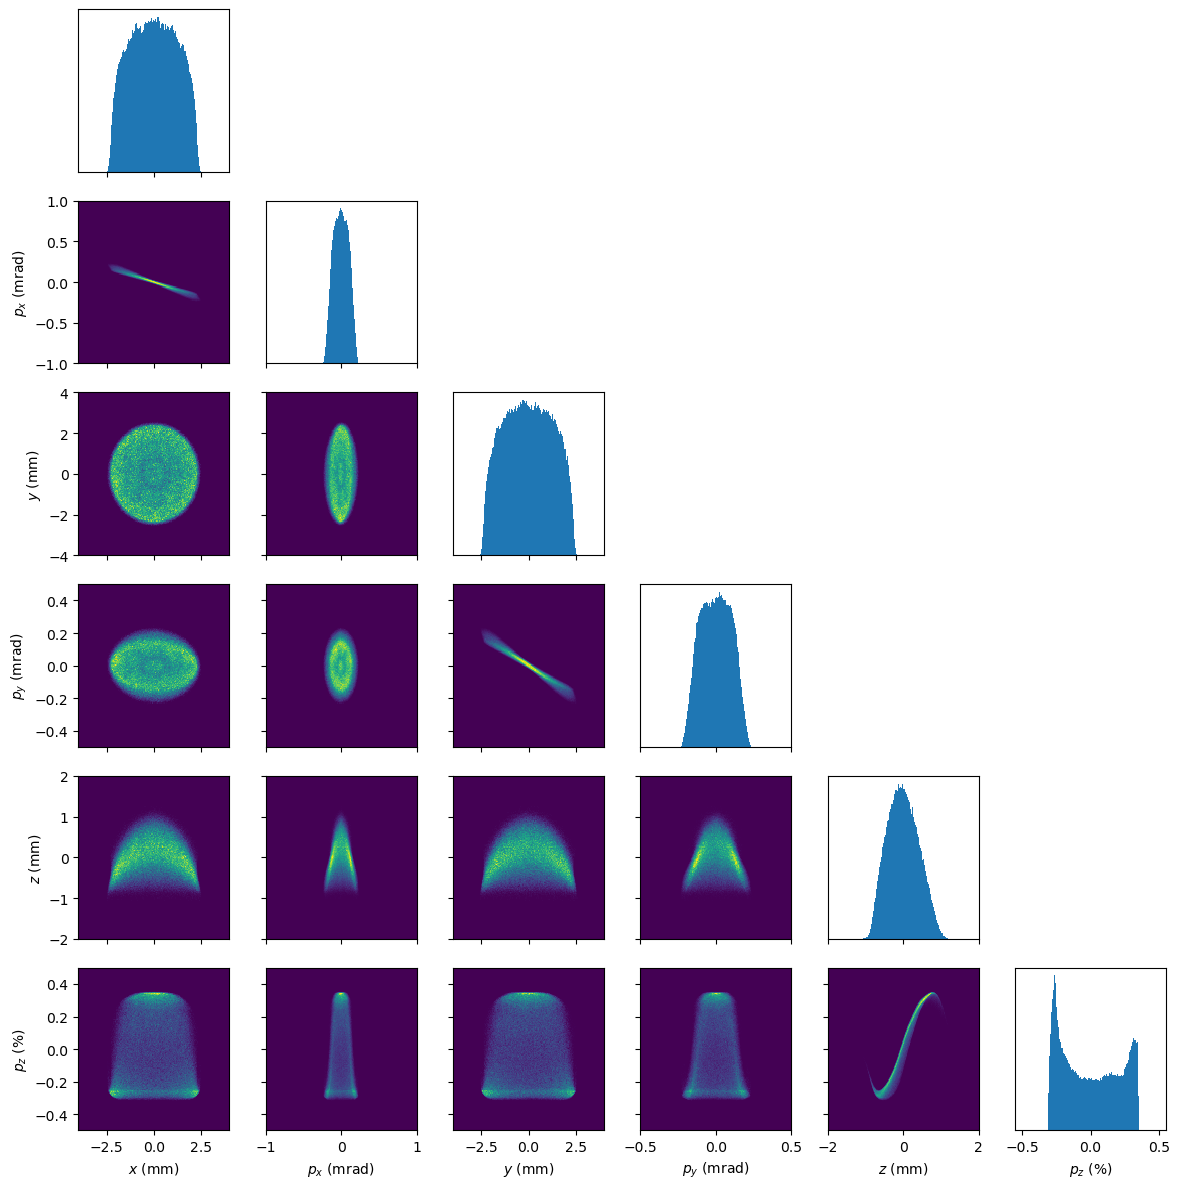

In [4]:
#plot gt beam
lims = np.array([[-4e-3, 4e-3],
                 [-1e-3, 1e-3],
                 [-4e-3, 4e-3],
                 [-0.5e-3, 0.5e-3],
                 [-2e-3, 2e-3],
                 [-0.5e-2, 0.5e-2]])*1
fig, ax = plot_projections(
    gt_beam.numpy_particles(),
    custom_lims = lims,
    bins= 150,
    background = 0
)

In [5]:
# ===========================================================================================================================================
# ===========================================================================================================================================
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from phase_space_reconstruction.virtual.beamlines import palxfel_Simulation
from phase_space_reconstruction.diagnostics import ImageDiagnostic
from phase_space_reconstruction.train import train_3d_scan_palxfel_Simulation

from bmadx.plot import plot_projections
from bmadx.constants import PI
from bmadx.bmad_torch.track_torch import particle_to_beam



In [6]:
# diagnostic beamline:
lattice_scm1, lattice_scm2 = palxfel_Simulation(p0c=p0c, dipole_on=True)

In [7]:
lattice_scm1

TorchLattice(
  (elements): ModuleList(
    (0): TorchQuadrupole()
    (1): TorchDrift()
    (2): TorchQuadrupole()
    (3): TorchDrift()
    (4): TorchRFCavity()
    (5): TorchDrift()
    (6): TorchQuadrupole()
    (7): TorchDrift()
    (8): TorchQuadrupole()
    (9-15): 7 x TorchDrift()
  )
)

In [8]:
lattice_scm2

TorchLattice(
  (elements): ModuleList(
    (0): TorchQuadrupole()
    (1): TorchDrift()
    (2): TorchQuadrupole()
    (3): TorchDrift()
    (4): TorchRFCavity()
    (5): TorchDrift()
    (6): TorchQuadrupole()
    (7): TorchDrift()
    (8): TorchQuadrupole()
    (9): TorchDrift()
    (10): TorchSBend()
    (11-13): 3 x TorchDrift()
    (14): TorchSBend()
    (15): TorchDrift()
  )
)

In [9]:
vs = torch.linspace(-194.5, -188.5, 7) # Cavity phase setup

A = vs * PI/180 * 2*PI
B = A * 180/np.pi
C = B + (360*3)

print(C) # for Bmad-X simulation

vs = C-90 + 360
vs = -vs
print(vs) # For elegant simulation


tensor([-142.0796, -135.7964, -129.5131, -123.2299, -116.9468, -110.6638,
        -104.3805])
tensor([-127.9204, -134.2036, -140.4869, -146.7701, -153.0532, -159.3362,
        -165.6195])


In [10]:
from bmadx import PI
scan_ids = [0, 2, 4, 6, 8, 10, 14] 

n_ks = 7
ks = torch.linspace(-1.5, 1.5, n_ks) # quad ks
vs = torch.tensor([-142.079589844, -135.796386719, -129.513061523, -123.229858398, -116.946777344, -110.663818359, -104.380493164]) * PI/180 / (2*PI)
gs = torch.ones(len(vs))*34146576.00000 # Reference beam energy at the dipole magnets
ts = torch.ones(len(vs))*1.35E6 # Cavity gradient
ks2= torch.ones(len(vs))*1E-16 # Quad strength
ks3= torch.ones(len(vs))*1E-16 # Quad strength
ks4= torch.ones(len(vs))*1E-16 # Quad strength

vs = torch.cat((torch.ones(1)*0, vs))
gs = torch.cat((torch.ones(1)*p0c, gs))
ts = torch.cat((torch.ones(1)*3E-16, ts))
ks2 = torch.cat((torch.ones(1)*ks2[0], ks2))
ks3 = torch.cat((torch.ones(1)*ks3[0], ks3))
ks4 = torch.cat((torch.ones(1)*ks4[0], ks4))

train_params  = torch.meshgrid(ks, vs, indexing="ij")
params  = torch.stack(train_params, dim=-1).reshape((-1, 2))
print(len(params))


# Re-define the parameter for exact cases
params = torch.cat(( params.squeeze(), 
                    torch.Tensor.repeat(gs,len(ks)).unsqueeze(-1), 
                    torch.Tensor.repeat(ts,len(ks)).unsqueeze(-1),
                    torch.Tensor.repeat(ks2,len(ks)).unsqueeze(-1),
                    torch.Tensor.repeat(ks3,len(ks)).unsqueeze(-1),
                    torch.Tensor.repeat(ks4,len(ks)).unsqueeze(-1)),1).unsqueeze(-1)

56


In [11]:
bins2 = torch.linspace(-7, 7, 500) * 1e-3
bandwidth2 = (bins2[1]-bins2[0]) / 2
screen2 = ImageDiagnostic(bins2, bins2, bandwidth2)
resolution2 = bandwidth2*2
print(resolution2)


tensor(2.8056e-05)


In [12]:
# generate and save train and test datasets
save_dir = os.path.join('./data')
from phase_space_reconstruction.virtual.scans import run_palxfel_Simulation

gt_dset = run_palxfel_Simulation(
    gt_beam,
    lattice_scm1,
    lattice_scm2,
    screen2,
    params,
    ids = scan_ids,
    save_as = os.path.join(save_dir, 'GroundTruth_Dataset.dset')
    )




dataset saved as './data/GroundTruth_Dataset.dset'


In [13]:
# load data
dset = torch.load('./data/GroundTruth_Dataset.dset', weights_only=False)
print(len(dset.images1))
print(len(dset.images2))

56
56


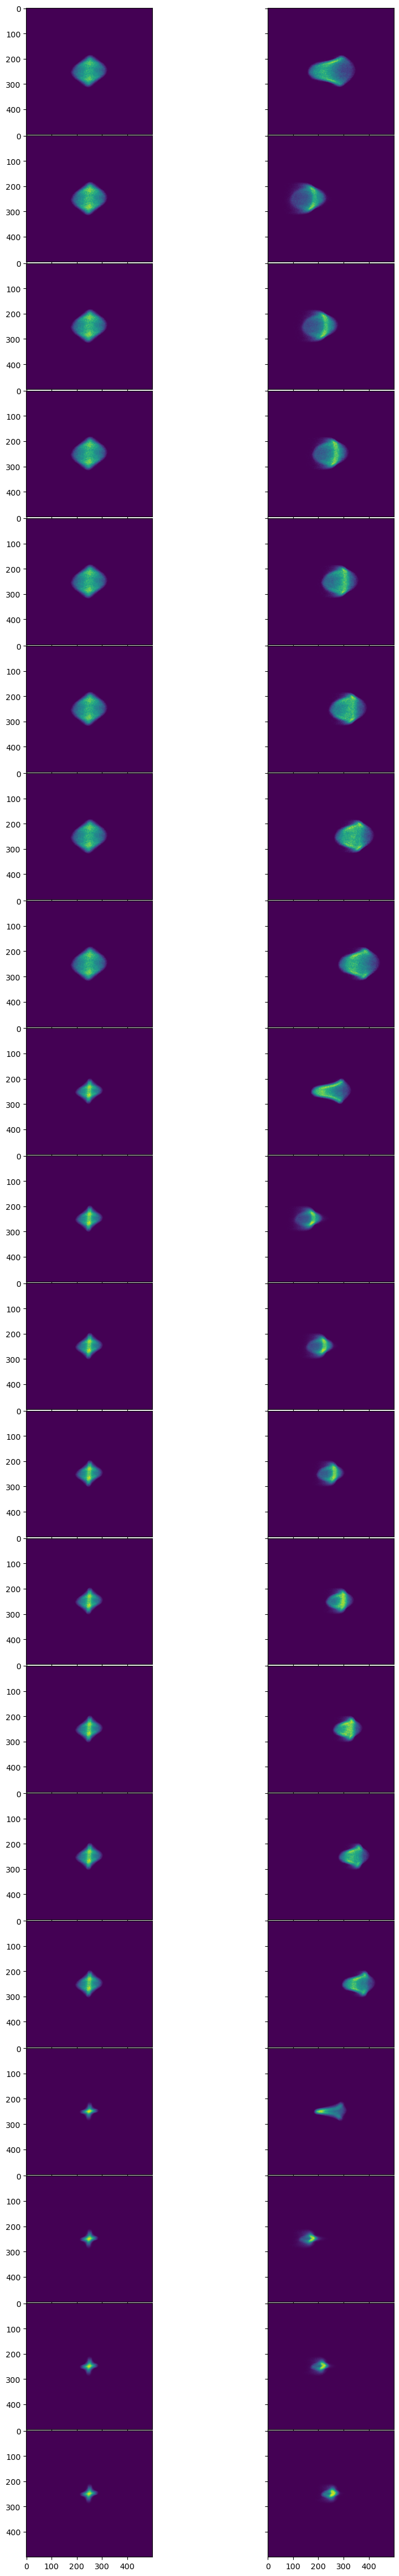

In [14]:
s = torch.arange(0,20,1).to(device='cuda')
fig,ax = plt.subplots(len(s),2,sharex="all", sharey="all", gridspec_kw={"hspace":0.01,"wspace":0.02,"right":0.97,"top":2.5,"bottom":1})
fig.set_size_inches(10,30)
for i in range(len(s)):
    ax[i][0].imshow((np.transpose(dset.images1[i+0][0])))
    ax[i][1].imshow((np.transpose(dset.images2[i+0][0])))



In [15]:
%%time
save_dir = './'

CPU times: user 3 μs, sys: 3 μs, total: 6 μs
Wall time: 14.1 μs


In [16]:
from phase_space_reconstruction.train import train_3d_scan_palxfel_Simulation

pred_beam_3d_scan_10_000, model = train_3d_scan_palxfel_Simulation(
    dset, 
    lattice_scm1,
    lattice_scm2,
    p0c, 
    screen2, 
    screen2, 
    ids = scan_ids,
    n_epochs = 2_000, 
    n_particles = 100_000, 
    device = 'cuda',
    save_dir = save_dir,
    distribution_dump_frequency=200,
    distribution_dump_n_particles=500_000,
    #use_decay=True,
    lr=0.01, # Also try it with 0.005.
    )

Using device: cuda
0 tensor(1.1212e-05, device='cuda:0', grad_fn=<AddBackward0>)
50 tensor(3.0097e-06, device='cuda:0', grad_fn=<AddBackward0>)
100 tensor(1.9483e-06, device='cuda:0', grad_fn=<AddBackward0>)
150 tensor(1.6381e-06, device='cuda:0', grad_fn=<AddBackward0>)
200 tensor(1.4383e-06, device='cuda:0', grad_fn=<AddBackward0>)
250 tensor(1.5685e-06, device='cuda:0', grad_fn=<AddBackward0>)
300 tensor(1.5725e-06, device='cuda:0', grad_fn=<AddBackward0>)
350 tensor(1.4519e-06, device='cuda:0', grad_fn=<AddBackward0>)
400 tensor(1.2477e-06, device='cuda:0', grad_fn=<AddBackward0>)
450 tensor(1.2623e-06, device='cuda:0', grad_fn=<AddBackward0>)
500 tensor(1.2294e-06, device='cuda:0', grad_fn=<AddBackward0>)
550 tensor(1.3436e-06, device='cuda:0', grad_fn=<AddBackward0>)
600 tensor(1.2967e-06, device='cuda:0', grad_fn=<AddBackward0>)
650 tensor(1.4296e-06, device='cuda:0', grad_fn=<AddBackward0>)
700 tensor(1.4232e-06, device='cuda:0', grad_fn=<AddBackward0>)
750 tensor(1.5526e-06, d

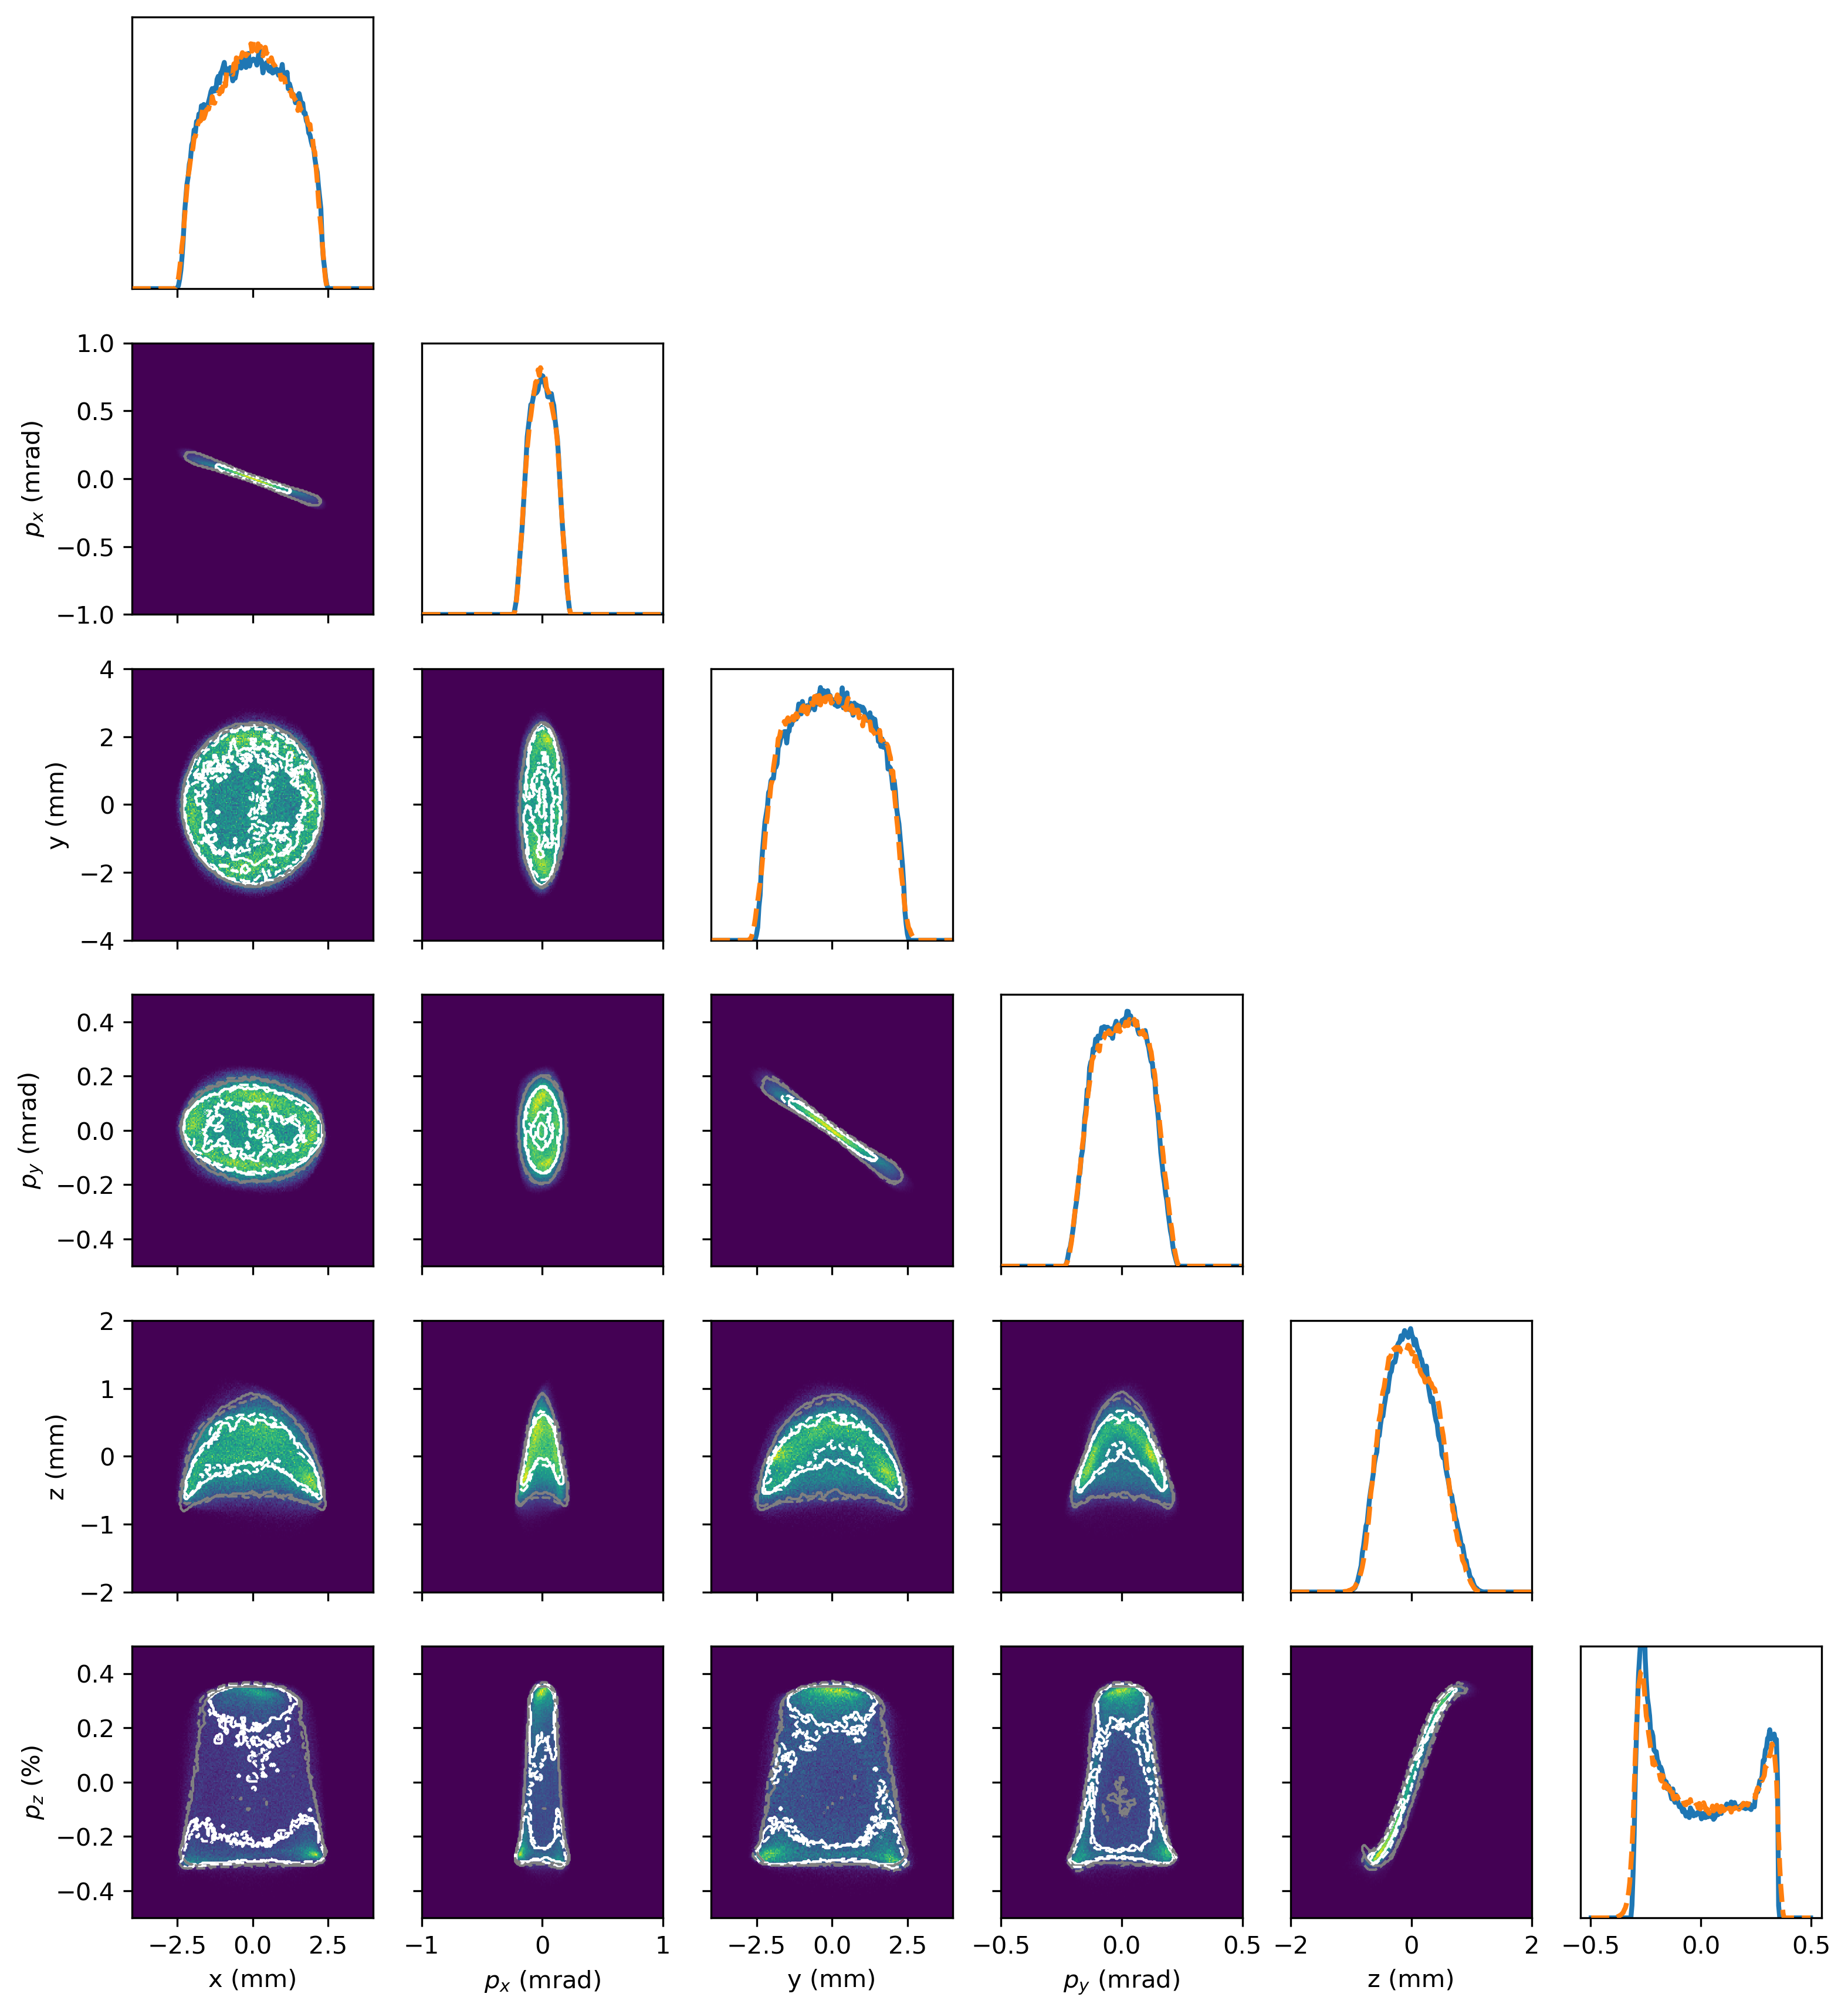

In [23]:
import torch
from stats import plot_projections_with_contours, show_cov_stats
import os


lims = np.array([[-4e-3, 4e-3],
                 [-1e-3, 1e-3],
                 [-4e-3, 4e-3],
                 [-0.5e-3, 0.5e-3],
                 [-2e-3, 2e-3],
                 [-0.5e-3, 0.5e-3]])*1E3

pred_beam = torch.load(os.path.join('3d_scan_result.pt'))
recn_dist = torch.load(os.path.join('dist_2000.pt'))
recn_dist.data = recn_dist.data
fig,ax = plot_projections_with_contours(
    recn_dist,
    gt_beam,
    n_bins=200,
    contour_percentiles = [50, 90],
    custom_lims=lims,
    contour_smoothing=0.25,
)

In [ ]:
X  = recn_dist.x
xp = recn_dist.px
Y  = recn_dist.y
yp = recn_dist.py
Z  = recn_dist.z
delta = recn_dist.pz

In [ ]:
torch.set_printoptions(precision=9)

emitx = torch.sqrt( torch.mean((X-torch.mean(X))**2)*torch.mean((xp-torch.mean(xp))**2) - torch.mean((X-torch.mean(X))*(xp-torch.mean(xp)))**2)
emity = torch.sqrt( torch.mean((Y-torch.mean(Y))**2)*torch.mean((yp-torch.mean(yp))**2) - torch.mean((Y-torch.mean(Y))*(yp-torch.mean(yp)))**2)
emitz = torch.sqrt( torch.mean((Z-torch.mean(Z))**2)*torch.mean((delta-torch.mean(delta))**2) - torch.mean((Z-torch.mean(Z))*(delta-torch.mean(delta)))**2)

# Normalized emittance
enx = emitx * (p0c/0.511e6)
eny = emity * (p0c/0.511e6)
enz = emitz * (p0c/0.511e6)

sigx = torch.sqrt( torch.mean( ((X - torch.mean(X))**2 )))
sigy = torch.sqrt( torch.mean( ((Y - torch.mean(Y))**2 )))
sigz = torch.sqrt( torch.mean( ((Z - torch.mean(Z))**2 )))

# =====================================================================
# =====================================================================
# Linear Twiss parameters from this setting
betax = (sigx**2) / emitx
betay = (sigy**2) / emity

alphax= - (torch.mean((X-torch.mean(X))*(xp-torch.mean(xp)))) / emitx
alphay= - (torch.mean((Y-torch.mean(Y))*(yp-torch.mean(yp)))) / emity

print(enx)
print(eny)
print(enz)
print(sigx)
print(sigy)
print(sigz)

In [ ]:
# generate and save train and test datasets
save_dir = os.path.join('./data/')
from phase_space_reconstruction.virtual.scans import run_palxfel_Simulation

recon_dset = run_palxfel_Simulation(
    pred_beam,
    lattice_scm1,
    lattice_scm2,
    screen2,
    params,
    ids = scan_ids,
    save_as = os.path.join(save_dir, 'prediction_dataset.dset')
    )




In [ ]:

s = torch.arange(0,20,1).to(device='cuda')
fig,ax = plt.subplots(len(s),2,sharex="all", sharey="all", gridspec_kw={"hspace":0.02,"wspace":0.05,"right":0.97,"top":2.5,"bottom":1})
fig.set_size_inches(10,30)
for i in range(len(s)):
    ax[i][0].imshow((np.transpose(dset.images1[2*i][0])))
    ax[i][1].imshow((np.transpose(recon_dset.images1[2*i][0])))


In [ ]:

s = torch.arange(0,20,1).to(device='cuda')
fig,ax = plt.subplots(len(s),2,sharex="all", sharey="all", gridspec_kw={"hspace":0.02,"wspace":0.05,"right":0.97,"top":2.5,"bottom":1})
fig.set_size_inches(10,30)
for i in range(len(s)):
    ax[i][0].imshow((np.transpose(dset.images2[2*i][0])))
    ax[i][1].imshow((np.transpose(recon_dset.images2[2*i][0])))
